# Ways to improve
    1) preprocessing(increase gamma)
    2) transfer learning
    3) recurrent approach
    4) dataset improving
        a) data augmentation(recoloring, rotation)
        b) small window scaled up -
        c) make better for recurrent(equal timing) +
    5) fighting overfitting
    6) other loss function
    7) attention heatmap

In [ ]:
#####9####
###8###10##
##7#####11#
#6#######0#
##5#####1##
###4###2###
#####3####

In [1]:
import numpy as np
import os
import random
from functools import reduce

data = []
data_path = "D:\\Python\\Keras\\Wormax\\data_with_mass\\"

listdir = list(filter(lambda x: os.path.isfile, os.listdir(data_path)))        
listdir = np.array(listdir)
random.shuffle(listdir)
'''

#load blocks
data = []
for file_name in listdir:
    if len(data) > 20000:
        break
    if len(data) == 0:
        blocks = np.load(data_path + file_name)
        for i in blocks:
            for j in i:
                data.append(j)
                #
'''
for file_name in listdir:
    if len(data) > 10000:
        break
    if len(data) == 0:
        data = np.load(data_path + file_name)
    else:
        data = np.concatenate((data, np.load(data_path + file_name)))


In [10]:
#print(data.shape)
print(data[0][0][0].shape)
print(data[0][1])

(100, 160, 3)
[0.07, 0.54, False, False, False, False]


<IPython.core.display.Javascript object>


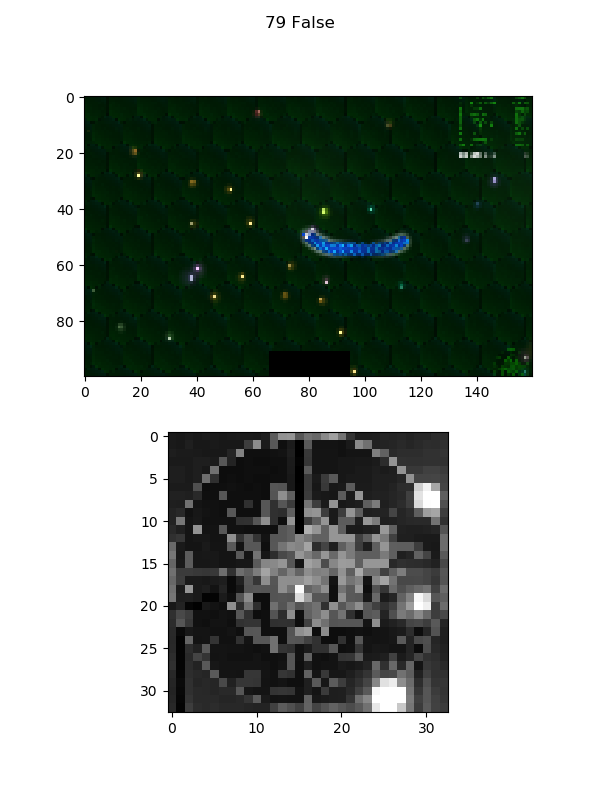

"\n# FOR 2 CHANNELS\n\n#create two subplots\ngridsize = (2, 1)\nfig = plt.figure(figsize=(6, 8))\nax1 = plt.subplot2grid(gridsize, (0, 0))\nax2 = plt.subplot2grid(gridsize, (1, 0))\n\n#create two image plots\nim1 = ax1.imshow(data[0][0][:,:,0], cmap='Greys_r')\nim2 = ax2.imshow(data[0][0][:,:,1], cmap='Greys_r')\n\ndef update(i):\n    print('ihthmg1.shape')\n    img1 = prepare_image(data[i][0])\n    print('img1.shape')\n    im1.set_data(img1[:,:,0])\n    im2.set_data(img1[:,:,1])\n\nani = FuncAnimation(plt.gcf(), update, interval=10)\nplt.show()"

In [2]:
%matplotlib notebook
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from grabscreen import grab_screen
from image_preproc import preproc_img, prepare_image

gridsize = (2, 1)
fig = plt.figure(figsize=(6, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (1, 0))

im1 = ax1.imshow(data[0][0][0])
im2 = ax2.imshow(data[0][0][1], cmap='Greys_r')
fig.suptitle('test title', fontsize=20)

def is_dead(frame):
    return np.min(frame[0][1][0:8,0:30]) == 0 and np.var(frame[0][1][0:8,0:30]) > 4800 and \
           np.max(frame[0][1][0:8,0:30]) >= 248 or np.mean(frame[0][1][17:20, 15:20]) == 48.8
    
def update(i):#1555, 1305
    i = i#1582-45+i #11027 #45 frames to dead
    #fig.suptitle(str(data[i][1]), fontsize=20)
    #fig.suptitle(str(np.mean(data[i][0][1][17:20, 15:20]) == 33.4 or 
     #                np.mean(data[i][0][1][17:20, 15:20]) == 48.8) + ' ' + str(i), fontsize=20)
    fig.suptitle(str(i)+' '+str(is_dead(data[i])))#str(np.min(data[i][0][1][0:8,0:30])), fontsize=20) # min 0, max 249, var 4800+
    im1.set_data(data[i][0][0])    
    im2.set_data(data[i][0][1])
    #im1.set_data(preproc_img(grab_screen()))

ani = FuncAnimation(plt.gcf(), update, interval=10)
plt.show()
'''
# FOR 2 CHANNELS

#create two subplots
gridsize = (2, 1)
fig = plt.figure(figsize=(6, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (1, 0))

#create two image plots
im1 = ax1.imshow(data[0][0][:,:,0], cmap='Greys_r')
im2 = ax2.imshow(data[0][0][:,:,1], cmap='Greys_r')

def update(i):
    print('ihthmg1.shape')
    img1 = prepare_image(data[i][0])
    print('img1.shape')
    im1.set_data(img1[:,:,0])
    im2.set_data(img1[:,:,1])

ani = FuncAnimation(plt.gcf(), update, interval=10)
plt.show()'''

### Dead marker invariant

In [47]:
dead_pic = data[1572][0][1][17:20, 15:20]
plt.imshow(dead_pic, cmap='Greys_r')
print(np.mean(dead_pic))

33.46666666666667


# Display heatmap

In [2]:
import numpy as np
data = np.load("D:\Python\Keras\Wormax\heatmap.npy")

In [3]:
data.shape

(1000, 100, 160, 3)

<IPython.core.display.Javascript object>


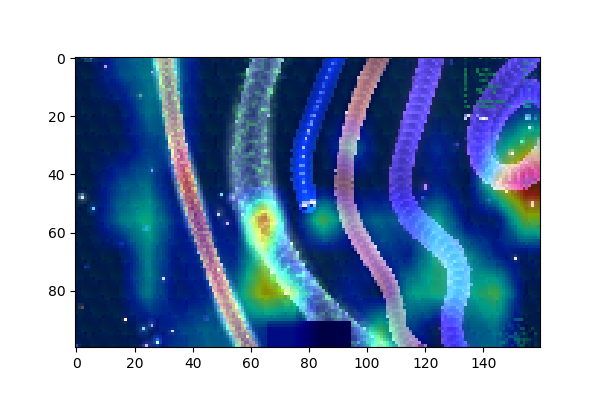

In [6]:
%matplotlib notebook
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from grabscreen import grab_screen
from image_preproc import preproc_img, prepare_image

gridsize = (1, 1)
fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot2grid(gridsize, (0, 0))

im1 = ax1.imshow(data[0])

def update(i):
    im1.set_data(data[i])
    #im1.set_data(preproc_img(grab_screen()))

ani = FuncAnimation(plt.gcf(), update, interval=50)
plt.show()

# Mass recognition

<IPython.core.display.Javascript object>


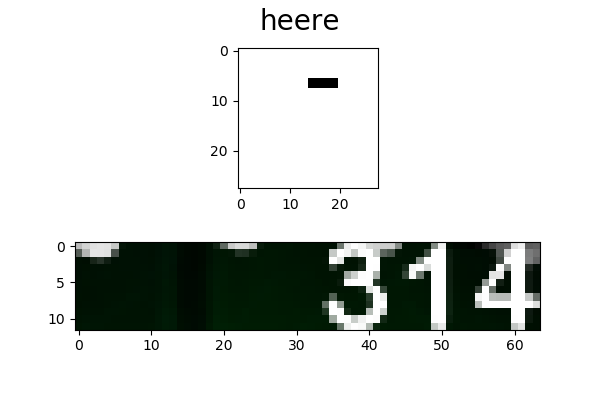

In [2]:
from recognize_score import make_null_image

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from image_preproc import get_preprocessed_and_other
from getkeys import key_check

from PIL import ImageGrab
def get_frame_data(i):
    return make_null_image(data[i][0][2])
def get_image(i):
    return data[i][0][2]

gridsize = (2, 1)
fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (1, 0))


tmp = np.zeros_like(get_frame_data(0))
tmp[0][0] = 255
im1 = ax1.imshow(tmp,cmap='Greys')
im2 = ax2.imshow(get_image(0))
#print(get_frame_data())
#plt.imsave('numbers.jpg',get_frame_data())
n = 0
def update(i):
    global n
    img = get_frame_data(i+n)
    while np.sum(img)==0 or np.sum(img)==48960:
        n+=1
        img = get_frame_data(i+n)
    i += n
    fig.suptitle(str(i)+' '+str(np.sum(img)), fontsize=20)
    img = img
    im1.set_cmap('Greys')
    im1.set_data(img)
    im2.set_data(get_image(i))
    #im1.set_data(preproc_img(grab_screen()))

ani = FuncAnimation(plt.gcf(), update, interval=1)
plt.show()